# **Developing better Civic Services through Crowdsourcing: The Twitter Case Study**

Civic technology is technology that promotes civic engagement or allows the government to provide citizens services and to establish partnerships with the public. 'Civic technology' describes all public sector and city life innovations, but government technology is a more fitting word for that broader group. In order to bridge the gap between citizens and government we have used twitter as a platform for crowdsourcing. After analyzing the problem, citizens can voluntarily provide solutions for the problem which inclines to Civic tech purpose.

Here, we have fetched the tweets from the Twitter platform and have applied LDA topic modelling method which categorizes whether the topics have been correctly identified or not with the help of coherence score.

Then, we have added a deep learning model as classifier to classify the tweets to it's respective topic. For that, we have used a reuter's dataset which gives us the news as our training dataset and labels will be respective topic name. 

At the end, you can find the twitter data visualization which gives you the more details about the data that we have received through the twitter.


In [0]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import pdb
import json
import csv

class listener(StreamListener):

    def on_data(self, data):

        data = json.loads(data)
        tweet = list(data.values())[3]
        tweet = tweet.replace(",", "")
        print(tweet)
        file = open("tweetDB.csv","a")
        file.write(tweet)
        file.write("\n")
        file.close()
        return(True)

    def on_error(self, status):
        print(status)


auth = OAuthHandler("##Consumer_token##", "##Consumer secret##")
auth.set_access_token("##Access_Token##", "##Access token secret##")

twitterStream = Stream(auth, listener())
#twitterStream.filter(locations=[-80.37,43.13,-78.73,44.06],track=["public issues"])

twitterStream.filter(track=["public issues","current affairs","current issues","transport issues","water issues","government issues"])



RT @gemmaod1: The #SinnFein funded organisation #Antifa which attacked members of the public as they tried to attend Anti-Corruption Irelan…
RT @ReliableSources: Both President Trump and Sen. Bernie Sanders have critiqued the media. David Sirota a Sanders campaign adviser says…
RT @ConLawWarrior: Notably many of these issues could be resolved by one simple thing: require agents of the government who engage in thes…
RT @davidsirota: Really appreciate @brianstelter having me on to discuss our argument that media owned by corporations and billionaires oft…
RT @ReliableSources: Both President Trump and Sen. Bernie Sanders have critiqued the media. David Sirota a Sanders campaign adviser says…
@ProfJNMoyo @Kennias12 @InfoMinZW I'm happy you are noticing how bad is the situation now but by the time you were… https://t.co/stbHsPt25S
RT @_JakubJanda: It is highly probable that Czech Senate President will soon propose (to the Czech government) to expel the Chinese Ambassa…
RT @CombatNTDs: Gende

KeyboardInterrupt: ignored

In [0]:
import pandas as pd

data = pd.read_csv('/content/tweetDB.csv',error_bad_lines=False)
data.columns = ["tweet"]
data.head()

,tweet
0,RT @ReliableSources: Both President Trump and ...
1,RT @ConLawWarrior: Notably many of these issue...
2,RT @davidsirota: Really appreciate @brianstelt...
3,RT @ReliableSources: Both President Trump and ...
4,@ProfJNMoyo @Kennias12 @InfoMinZW I'm happy yo...


In [0]:
# Load the regular expression library
import re

# Remove punctuation and symbols
data['tweet'] = data['tweet'].map(lambda x: re.sub('[,\.!?@]', '', x))
data['tweet'] = data['tweet'].map(lambda x: re.sub('https', '', x))

#Converting tweets into lower case
data['tweet'] = data['tweet'].map(lambda x: x.lower())


<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-47-7d50946c4fa8>:4: DeprecationWarning: invalid escape sequence \.
  data['tweet'] = data['tweet'].map(lambda x: re

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import nltk
#nltk.download()
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import gensim

def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))


# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

processed_text = []
for row in range(data.shape[0]):
  processed_text = processed_text + preprocess(data.iloc[row,:].tweet)
  #text.append(preprocess(data.iloc[row,:].tweet))


dataset = [d.split() for d in processed_text]

#Maps normalized words to it's integer ids
dictionary = gensim.corpora.Dictionary(dataset)

#Collection of words to bag of words
bow_corpus = [dictionary.doc2bow(doc) for doc in dataset]

#print(dictionary)
print(bow_corpus)


[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(4, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(6, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(4, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(43, 1)], [(1, 1)], [(44, 1)], [(45, 1)], [(42, 1)], [(20, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(50, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(55, 1)], [(56, 1)], [(14, 1)], [(57, 1)], [(58, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(63, 1)], [(64, 1)], [(65, 1)], [(66, 1)], [(67, 1)], [(14, 1)], [(68, 1)], [(69, 1)], [(46, 1)], [(70, 1)], [(71, 1)], 

In [0]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dictionary,                                   
                                   passes = 10,
                                   workers = 2)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

Topic: 0 
Words: 0.043*"say" + 0.035*"have" + 0.034*"affair" + 0.033*"brianstelt" + 0.029*"critiqu" + 0.028*"advis" + 0.025*"video" + 0.022*"want" + 0.021*"democrat" + 0.020*"china"


Topic: 1 
Words: 0.077*"current" + 0.037*"discuss" + 0.037*"trump" + 0.035*"corpor" + 0.030*"campaign" + 0.026*"peopl" + 0.024*"fisa" + 0.024*"share" + 0.014*"ambassador" + 0.011*"critic"


Topic: 2 
Words: 0.099*"issu" + 0.069*"media" + 0.036*"berni" + 0.030*"billionair" + 0.029*"davidsirota" + 0.029*"argument" + 0.025*"david" + 0.025*"sirota" + 0.025*"biden" + 0.023*"week"


Topic: 3 
Words: 0.062*"sander" + 0.049*"public" + 0.035*"appreci" + 0.035*"presid" + 0.026*"watch" + 0.025*"expir" + 0.025*"thelastrefug" + 0.018*"countri" + 0.015*"gordongchang" + 0.012*"attend"


Topic: 4 
Words: 0.046*"govern" + 0.036*"own" + 0.031*"reliablesourc" + 0.030*"import" + 0.029*"understand" + 0.026*"author" + 0.025*"think" + 0.023*"health" + 0.022*"nomin" + 0.013*"hold"




In [0]:
#Calculate model complexity and coherance
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.8442038939342679


In [0]:
import pandas as pd
import numpy as np
import keras

from keras.datasets import reuters
#reuters.npz
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="/content/tweetDB.csv", num_words=None, 
                                                         skip_top=0,maxlen=None, test_split=0.2, 
                                                         seed=113, start_char=1,oov_char=2, 
                                                         index_from=3)
                                                         

Applying tokenization on the dataset. Convert the text sequences to matrices and labels to categorical format.

In [0]:
from keras import utils
from keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words=10000)
seq = np.concatenate((x_train, x_test), axis=0)
t.fit_on_sequences(seq)

xt_train = t.sequences_to_matrix(x_train, mode='tfidf')
xt_test = t.sequences_to_matrix(x_test, mode='tfidf')

yt_train = utils.to_categorical(y_train, max(y_train) + 1)
yt_test = utils.to_categorical(y_test, max(y_train) + 1)

Create a sequential deep learning model with dense layers for classification of the text according to the topic label.

In [0]:
from keras import layers, models, callbacks
from keras.layers.core import Dense, Dropout # Dropout is being used for not to overfit

# 3 elements, 1st is for first layer, 2nd for last layer
activations = ['relu', 'softmax'] 
layer_sizes = [512, 46] # for each layer a size is given
optimizer_method = 'adadelta'
batch_size = 128
epochs = 5
callback = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, 
                                   patience=2, mode='auto')

model = models.Sequential()
model.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
model.add(Dropout(0.5))
model.add(layers.Dense(layer_sizes[1], activation=activations[1]))
model.compile(optimizer=optimizer_method, loss='cosine_proximity', metrics=['accuracy'])

In [0]:
model.fit(x=xt_train, y=yt_train, batch_size=batch_size, epochs=epochs, verbose=1, 
          shuffle=True, validation_split=0.15, use_multiprocessing=True,
          workers=8, steps_per_epoch=None, callbacks=[callback])

Train on 7634 samples, validate on 1348 samples
Epoch 1/5
7634/7634 [==============================] - 1s 146us/step - loss: -0.6710 - acc: 0.6656 - val_loss: -0.7755 - val_acc: 0.7693
Epoch 2/5
7634/7634 [==============================] - 1s 94us/step - loss: -0.8205 - acc: 0.8152 - val_loss: -0.8142 - val_acc: 0.8071
Epoch 3/5
7634/7634 [==============================] - 1s 99us/step - loss: -0.8713 - acc: 0.8691 - val_loss: -0.8307 - val_acc: 0.8264
Epoch 4/5
7634/7634 [==============================] - 1s 93us/step - loss: -0.9048 - acc: 0.9052 - val_loss: -0.8438 - val_acc: 0.8383
Epoch 5/5
7634/7634 [==============================] - 1s 92us/step - loss: -0.9218 - acc: 0.9222 - val_loss: -0.8450 - val_acc: 0.8383


In [0]:
print(model.metrics_names)
model.evaluate(xt_test, yt_test)

['loss', 'acc']
2246/2246 [==============================] - 0s 102us/step


[-0.8285287194557733, 0.8196794301510282]

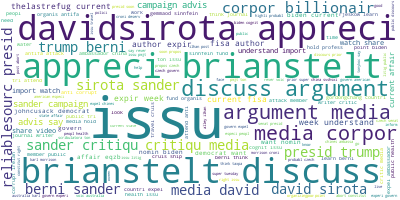

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(processed_text)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

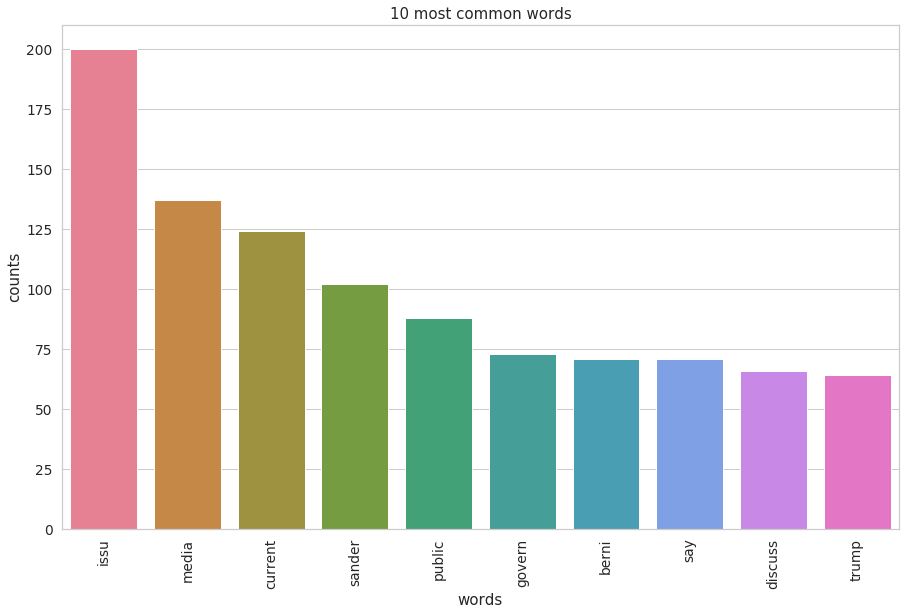

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(processed_text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.0MB/s 
     |████████████████████████████████| 552kB 45.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9c65383f03b6386853a5bca520884e9a1c7ab801662739652510a6d6fd65d697
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=66103c8427cbf71a92dce43a4260857845d6f250b81c0f2640f37471de3466e2
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.302059 -0.039395       1        1  21.823906
0      0.117605 -0.267312       2        1  19.912853
1      0.064790  0.109429       3        1  19.672964
3      0.068072  0.137713       4        1  19.462261
4      0.051592  0.059565       5        1  19.128012, topic_info=    Category        Freq       Term       Total  loglift  logprob
14   Default  148.000000       issu  148.000000  30.0000  30.0000
98   Default  105.000000    current  105.000000  29.0000  29.0000
6    Default  104.000000      media  104.000000  28.0000  28.0000
4    Default   83.000000     sander   83.000000  27.0000  27.0000
83   Default   66.000000     public   66.000000  26.0000  26.0000
..       ...         ...        ...         ...      ...      ...
880   Topic5    6.454348  constitut    7.081018   1.5614  -5.3176
92    Topic5    6.422390   joebiden    7.049067   1.5609  -5.3225
247   Topic5    6.391442       focu    7.017096   1.5606  -5.3273
883   Topic5    6.391425   prohibit    7.017096   1.5606  -5.3273
682   Topic5    6.390761      studi    7.017059   1.5605  -5.3275

[180 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
10        2  0.983476       advis
133       2  0.988252      affair
877       5  0.847329       alley
70        3  0.988463  ambassador
512       4  0.937160    american
...     ...       ...         ...
102       1  0.993971        week
632       1  0.960587       women
917       4  0.938793        work
165       1  0.981389      writer
272       1  0.890642        year

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4, 5])